In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import pickle

In [2]:
df= pd.read_csv("C:/Users/PcPack/Downloads/loan_sanction_train.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [7]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [10]:
df['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Crédit accordé ou pas'}, xlabel='Loan_Status'>

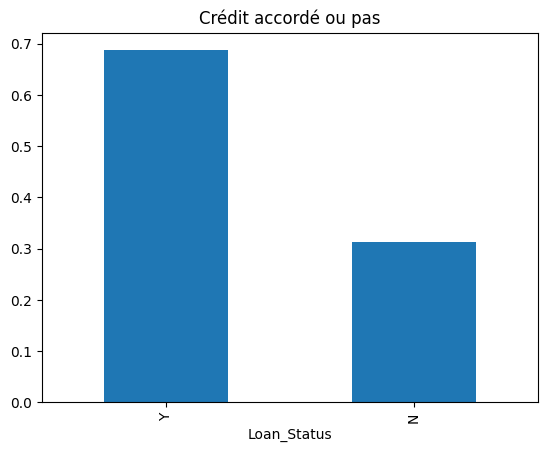

In [11]:
df['Loan_Status'].value_counts(normalize=True).plot.bar(title='Crédit accordé ou pas')

In [12]:
df['Dependents'].value_counts(normalize=True)*100

Dependents
0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: proportion, dtype: float64

<Axes: title={'center': 'Le nombre des enfants'}, xlabel='Dependents'>

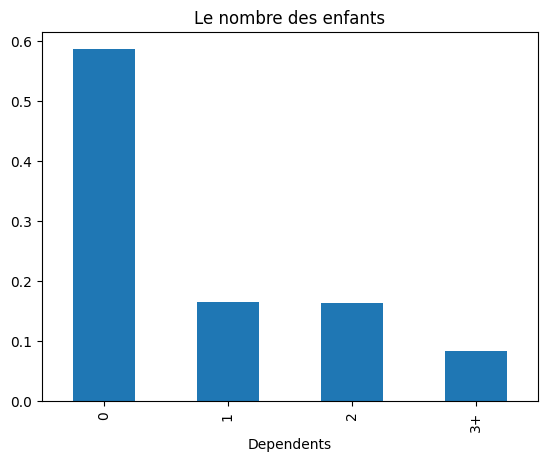

In [13]:
df['Dependents'].value_counts(normalize=True).plot.bar(title='Le nombre des enfants')

C:\Users\PcPack\AppData\Local\Temp\ipykernel_15752\4059882391.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


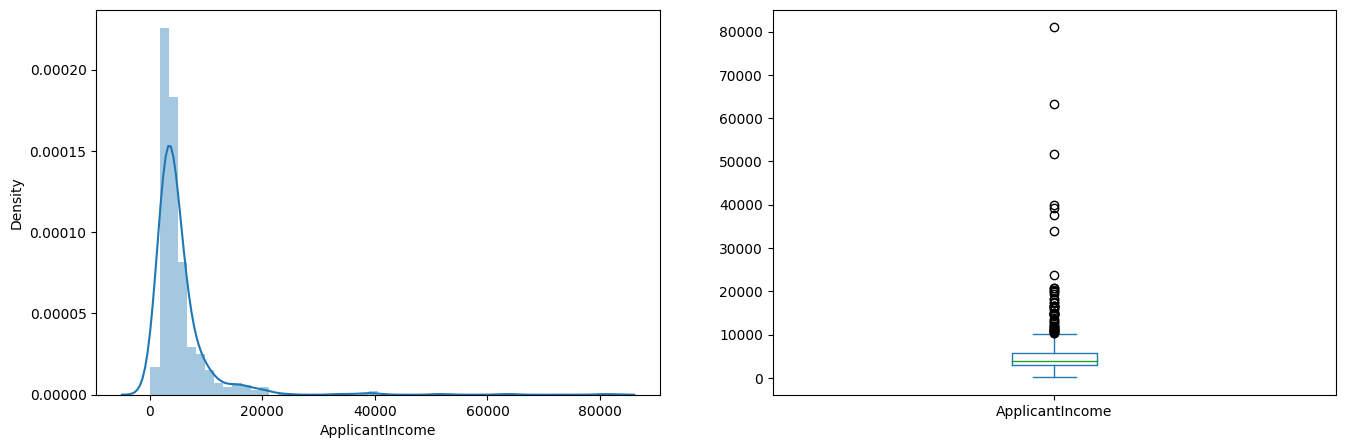

In [14]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

C:\Users\PcPack\AppData\Local\Temp\ipykernel_15752\204516721.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


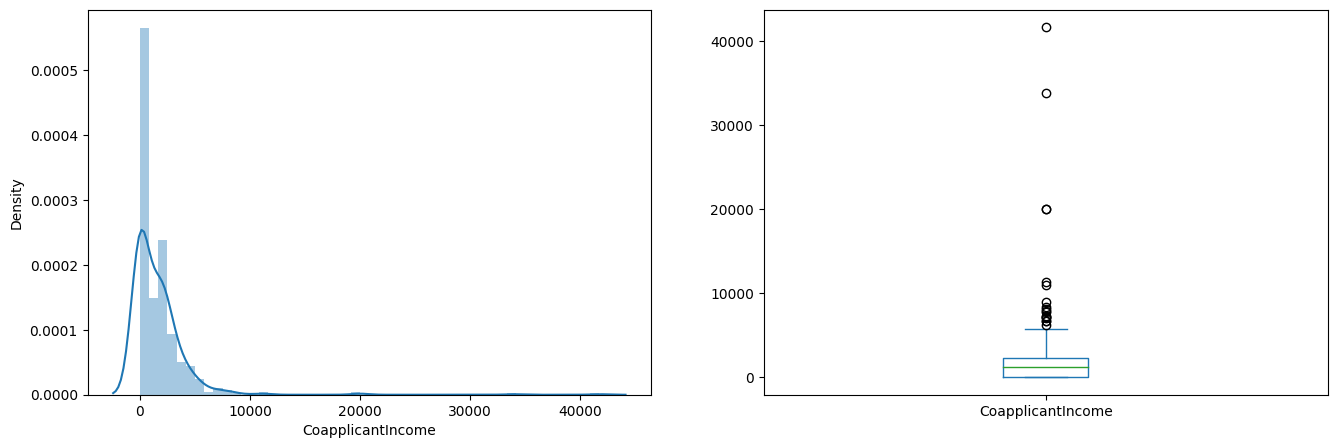

In [15]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.suptitle('')
plt.show()

In [16]:
var_cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
var_num=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

C:\Users\PcPack\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PcPack\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PcPack\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

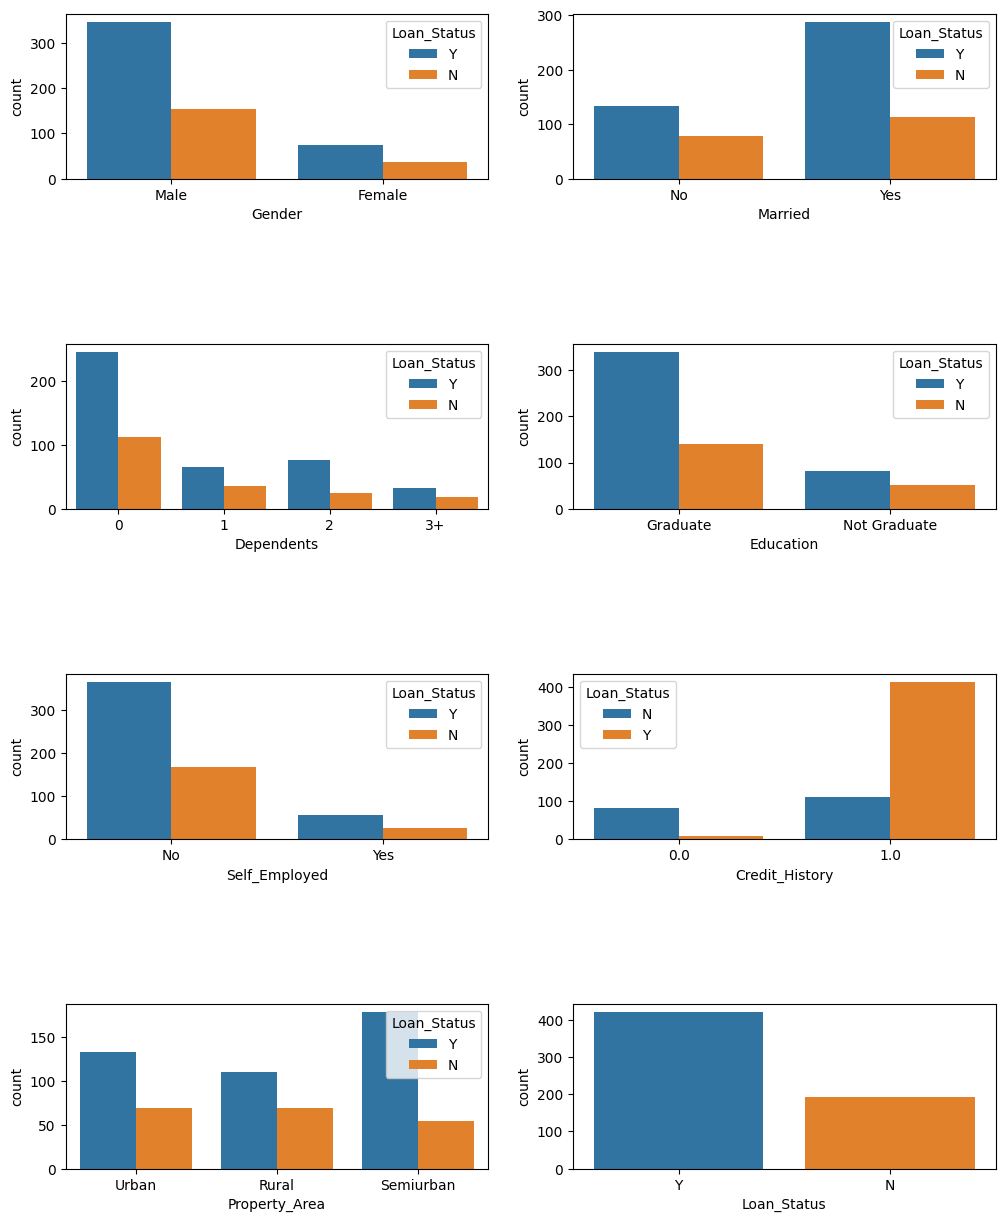

In [17]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
for idx, cat_col in enumerate(var_cat):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row, col])

plt.subplots_adjust(hspace=1) 
plt.show()

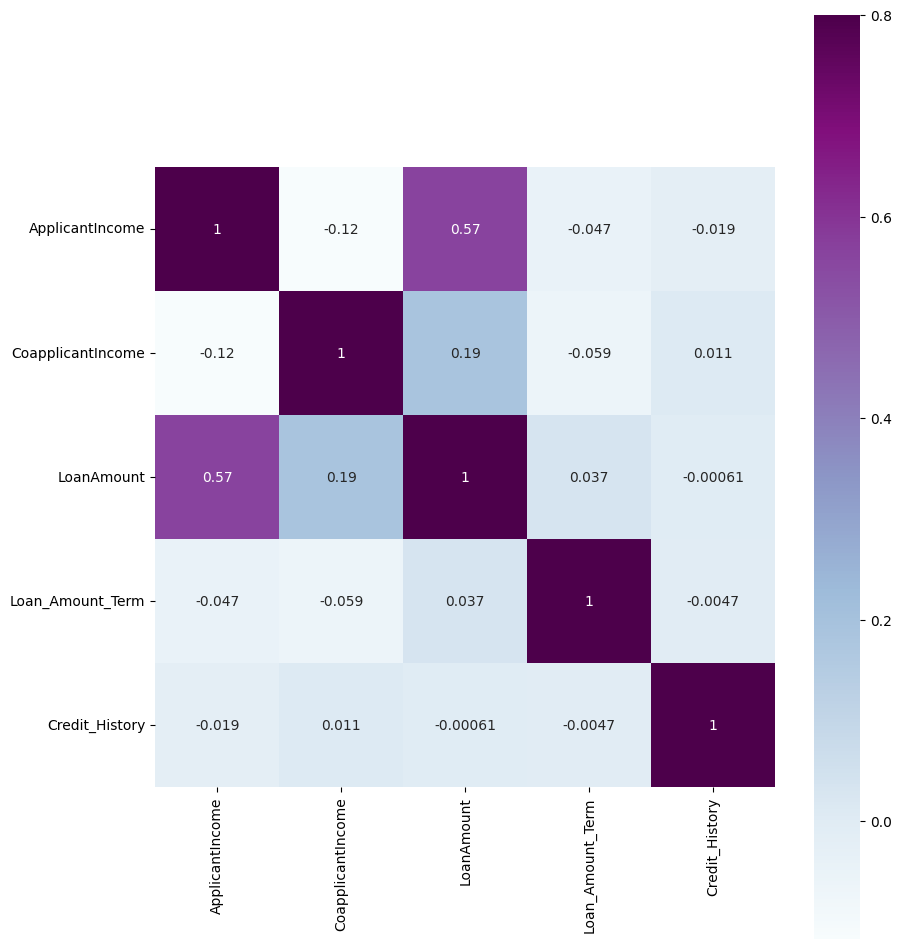

In [18]:
#correlation des variables numerique
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
matrix=numeric_columns.corr() 
f,ax=plt.subplots(figsize=(10,12)) 
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu',annot=True)
plt.show()

In [19]:
df_cat=df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [20]:
df_num=df[var_num]
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [21]:
df_cat=pd.get_dummies(df_cat,drop_first=True).astype(int)
df_cat

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,1,0,0,0,0,0,0,0,1,1
1,1,1,1,1,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,1,0,1,1
3,1,1,1,0,0,0,1,0,0,1,1
4,1,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,0,0,0,0,0,1
610,1,1,1,0,0,1,0,0,0,0,1
611,1,1,1,1,0,0,0,0,0,1,1
612,1,1,1,0,1,0,0,0,0,1,1


In [22]:
df_encoded=pd.concat([df_cat,df_num],axis=1).astype(int)
df_encoded

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1,0,0,0,0,0,0,0,1,1,5849,0,128,360
1,1,1,1,1,0,0,0,0,0,0,0,4583,1508,128,360
2,1,1,1,0,0,0,0,1,0,1,1,3000,0,66,360
3,1,1,1,0,0,0,1,0,0,1,1,2583,2358,120,360
4,1,1,0,0,0,0,0,0,0,1,1,6000,0,141,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,0,0,0,0,0,1,2900,0,71,360
610,1,1,1,0,0,1,0,0,0,0,1,4106,0,40,180
611,1,1,1,1,0,0,0,0,0,1,1,8072,240,253,360
612,1,1,1,0,1,0,0,0,0,1,1,7583,0,187,360


In [23]:
y=df_encoded['Loan_Status_Y']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: int32

In [24]:
X=df_encoded.drop('Loan_Status_Y',axis=1)
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1,0,0,0,0,0,0,0,1,5849,0,128,360
1,1,1,1,1,0,0,0,0,0,0,4583,1508,128,360
2,1,1,1,0,0,0,0,1,0,1,3000,0,66,360
3,1,1,1,0,0,0,1,0,0,1,2583,2358,120,360
4,1,1,0,0,0,0,0,0,0,1,6000,0,141,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,0,0,0,0,0,2900,0,71,360
610,1,1,1,0,0,1,0,0,0,0,4106,0,40,180
611,1,1,1,1,0,0,0,0,0,1,8072,240,253,360
612,1,1,1,0,1,0,0,0,0,1,7583,0,187,360


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [26]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",verticalalignment = 'bottom',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\PcPack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Logistic Regression): 0.8373983739837398
Confusion matrix, without normalization


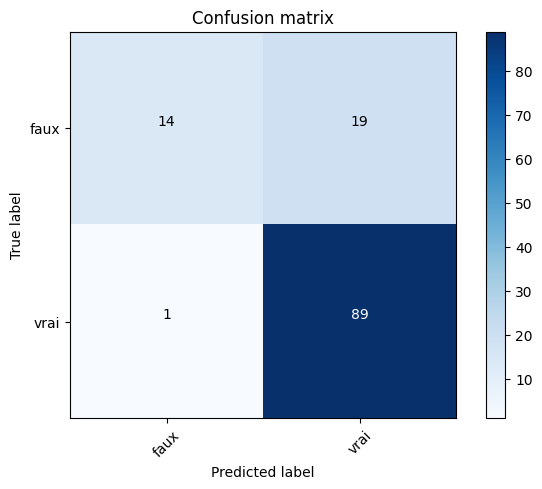

Precision (Logistic Regression): 0.8240740740740741
Recall (Logistic Regression): 0.9888888888888889


In [27]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression classifier
clf_lr = LogisticRegression()

# Train the Logistic Regression classifier
clf_lr.fit(X_train, y_train)

# Make predictions on the test set using Logistic Regression
pred_lr = clf_lr.predict(X_test)

# Calculate accuracy on the test set for Logistic Regression
accuracy_lr = accuracy_score(y_test, pred_lr)
print("Accuracy (Logistic Regression):", accuracy_lr)

# Calculate the confusion matrix for Logistic Regression
conf_mat_lr = confusion_matrix(y_test, pred_lr)

# Display the confusion matrix for Logistic Regression
plot_confusion_matrix(conf_mat_lr, classes=['faux', 'vrai'])

plt.savefig('logistic_regression_mat.png')
plt.show()
# Calculate precision and recall for Logistic Regression
precision_lr = precision_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr)

print("Precision (Logistic Regression):", precision_lr)
print("Recall (Logistic Regression):", recall_lr)


Accuracy (SVM): 0.7317073170731707
Confusion matrix, without normalization


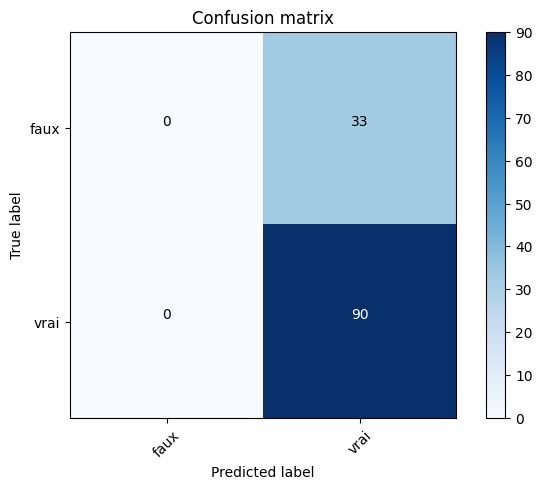

Precision (SVM): 0.7317073170731707
Recall (SVM): 1.0


In [28]:
from sklearn.svm import SVC

# Instantiate the Support Vector Machine (SVM) classifier
clf_svm = SVC()

# Train the SVM classifier
clf_svm.fit(X_train, y_train)

# Make predictions on the test set using SVM
pred_svm = clf_svm.predict(X_test)

# Calculate accuracy on the test set for SVM
accuracy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy (SVM):", accuracy_svm)

# Calculate the confusion matrix for SVM
conf_mat_svm = confusion_matrix(y_test, pred_svm)

# Display the confusion matrix for SVM
plot_confusion_matrix(conf_mat_svm, classes=['faux', 'vrai'])

plt.savefig('svm_mat.png')
plt.show()
# Calculate precision and recall for SVM
precision_svm = precision_score(y_test, pred_svm)
recall_svm = recall_score(y_test, pred_svm)

print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)


Accuracy (Random Forest): 0.8211382113821138
Confusion matrix, without normalization


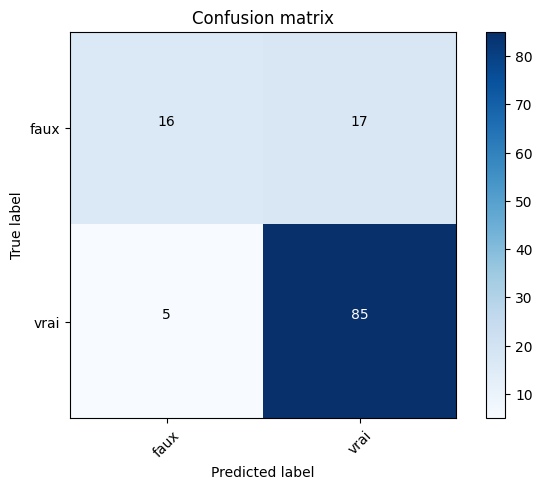

Precision (Random Forest): 0.8333333333333334
Recall (Random Forest): 0.9444444444444444


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest classifier
clf_rf = RandomForestClassifier()

# Train the Random Forest classifier
clf_rf.fit(X_train, y_train)

# Make predictions on the test set using Random Forest
pred_rf = clf_rf.predict(X_test)

# Calculate accuracy on the test set for Random Forest
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# Calculate the confusion matrix for Random Forest
conf_mat_rf = confusion_matrix(y_test, pred_rf)

# Display the confusion matrix for Random Forest
plot_confusion_matrix(conf_mat_rf, classes=['faux', 'vrai'])

plt.savefig('random_forest_mat.png')
plt.show()
precision_rf = precision_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)

print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)

Accuracy (GBM): 0.8292682926829268
Confusion matrix, without normalization


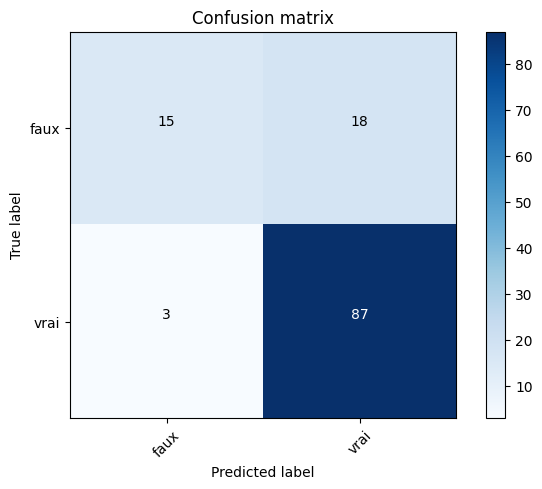

Precision (GBM): 0.8285714285714286
Recall (GBM): 0.9666666666666667


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the Gradient Boosting classifier
clf_gbm = GradientBoostingClassifier()

# Train the Gradient Boosting classifier
clf_gbm.fit(X_train, y_train)

# Make predictions on the test set using GBM
pred_gbm = clf_gbm.predict(X_test)

# Calculate accuracy on the test set for GBM
accuracy_gbm = accuracy_score(y_test, pred_gbm)
print("Accuracy (GBM):", accuracy_gbm)

# Calculate the confusion matrix for GBM
conf_mat_gbm = confusion_matrix(y_test, pred_gbm)

# Display the confusion matrix for GBM
plot_confusion_matrix(conf_mat_gbm, classes=['faux', 'vrai'])

plt.savefig('gbm_mat.png')
plt.show()
# Calculate precision and recall for GBM
precision_gbm = precision_score(y_test, pred_gbm)
recall_gbm = recall_score(y_test, pred_gbm)

print("Precision (GBM):", precision_gbm)
print("Recall (GBM):", recall_gbm)


Accuracy (ANN): 0.3821138211382114
Confusion matrix, without normalization


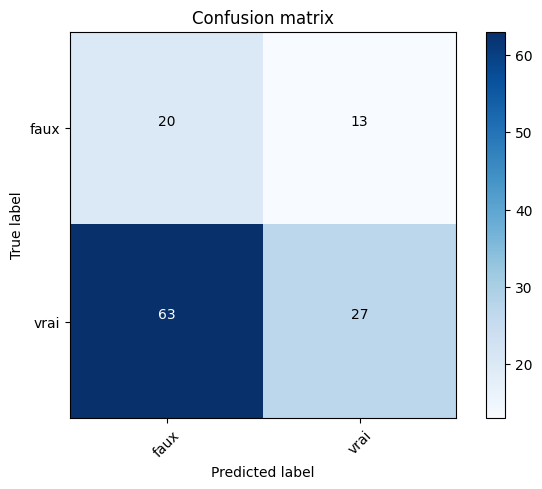

Precision (ANN): 0.675
Recall (ANN): 0.3


In [31]:
from sklearn.neural_network import MLPClassifier

# Instantiate the Artificial Neural Network (ANN) classifier
clf_ann = MLPClassifier()

# Train the ANN classifier
clf_ann.fit(X_train, y_train)

# Make predictions on the test set using ANN
pred_ann = clf_ann.predict(X_test)

# Calculate accuracy on the test set for ANN
accuracy_ann = accuracy_score(y_test, pred_ann)
print("Accuracy (ANN):", accuracy_ann)

# Calculate the confusion matrix for ANN
conf_mat_ann = confusion_matrix(y_test, pred_ann)

# Display the confusion matrix for ANN
plot_confusion_matrix(conf_mat_ann, classes=['faux', 'vrai'])

plt.savefig('ann_mat.png')
plt.show()
# Calculate precision and recall for ANN
precision_ann = precision_score(y_test, pred_ann)
recall_ann = recall_score(y_test, pred_ann)

print("Precision (ANN):", precision_ann)
print("Recall (ANN):", recall_ann)
